<a href="https://colab.research.google.com/github/yauyauua/Calculator-app/blob/master/UAS_5150.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (150, 5)

Dataset Head:
    SepalLength  SepalWidth  PetalLength  PetalWidth        Class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Summary Statistics:
        SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.00

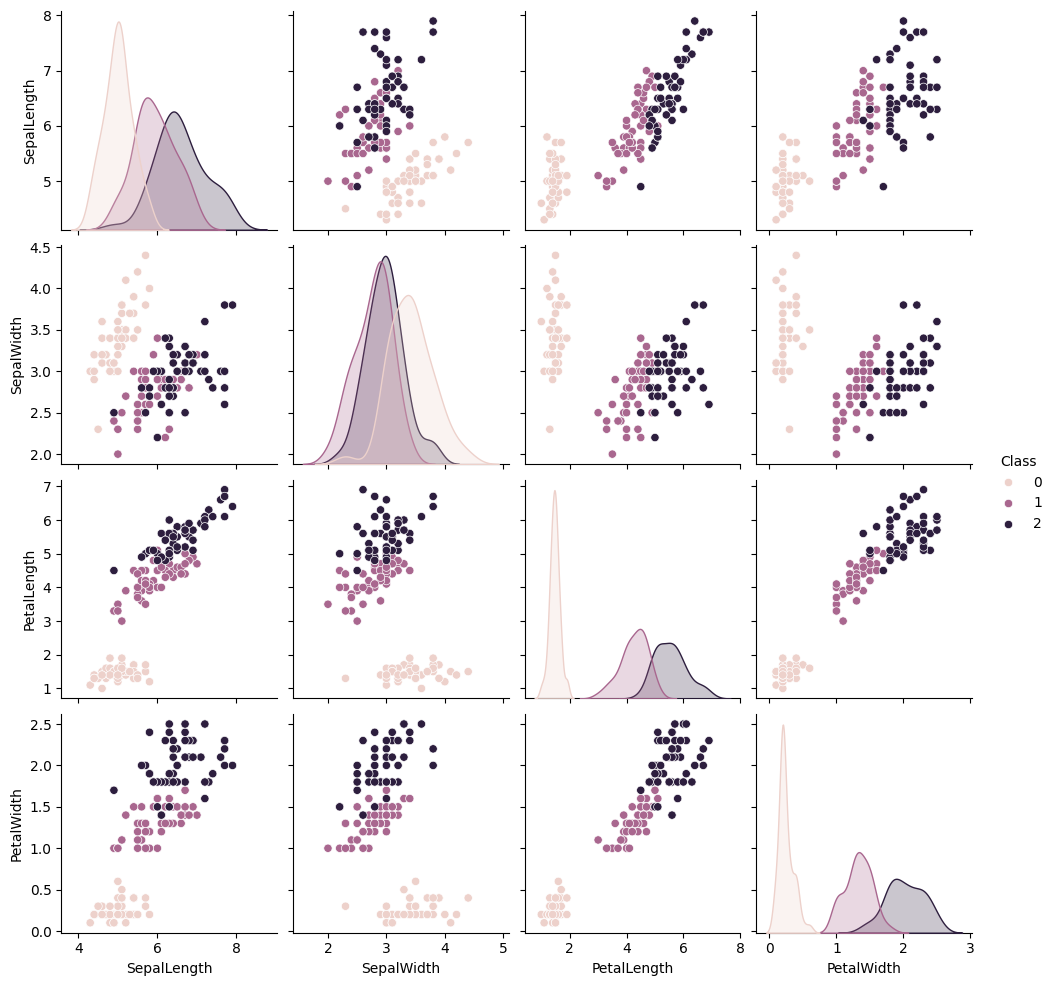

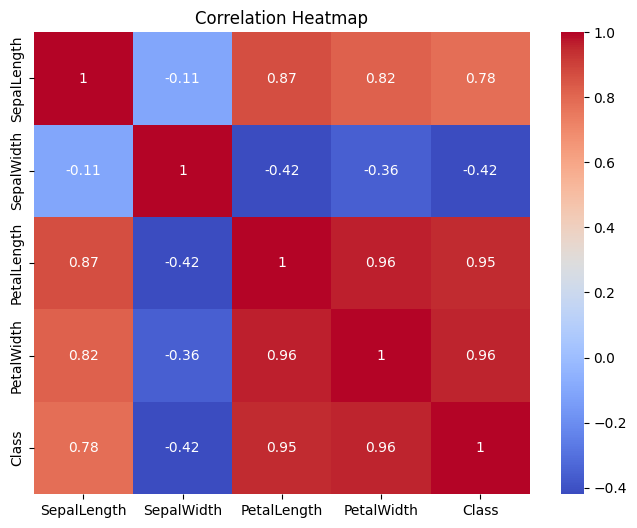


Feature Importances:
        Feature  Importance
2  PetalLength    0.436130
3   PetalWidth    0.436065
0  SepalLength    0.106128
1   SepalWidth    0.021678

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Model saved as model_rf.pkl. Upload this file to GitHub and Launchpad for sharing.

Processed dataset saved as processed_dataset.csv. Upload this file as well.


In [2]:
# Penerapan Predictive Analytics untuk Memprediksi Variabel Target Menggunakan Dataset Publik

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load Dataset
# Replace this link with a public dataset URL
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset = pd.read_csv(data_url, header=None)
dataset.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class']

# Step 2: Dataset Profiling
print("Dataset Shape:", dataset.shape)
print("\nDataset Head:\n", dataset.head())
print("\nDataset Info:\n")
dataset.info()
print("\nSummary Statistics:\n", dataset.describe())

# Step 3: Data Preprocessing
# Handling Missing Values
if dataset.isnull().sum().sum() > 0:
    print("\nMissing values found! Performing imputation.")
    dataset.fillna(dataset.mean(), inplace=True)

# Encoding Categorical Data
label_encoder = LabelEncoder()
dataset['Class'] = label_encoder.fit_transform(dataset['Class'])

# Feature Scaling
features = dataset.drop('Class', axis=1)
target = dataset['Class']
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 4: Exploratory Data Analysis
sns.pairplot(dataset, hue='Class', diag_kind='kde')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Step 5: Feature Selection
# Using Random Forest for Feature Importance
feature_selector = RandomForestClassifier(random_state=42)
feature_selector.fit(features_scaled, target)
importances = feature_selector.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": features.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print("\nFeature Importances:\n", feature_importance_df)

# Step 6: Modeling
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save Model and Share Links
import joblib
joblib.dump(model, "model_rf.pkl")
print("\nModel saved as model_rf.pkl. Upload this file to GitHub and Launchpad for sharing.")

# Optional: Save Preprocessed Data
dataset.to_csv("processed_dataset.csv", index=False)
print("\nProcessed dataset saved as processed_dataset.csv. Upload this file as well.")


Dataset Shape: (150, 5)

Dataset Head:
    SepalLength  SepalWidth  PetalLength  PetalWidth        Class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Summary Statistics:
        SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.00

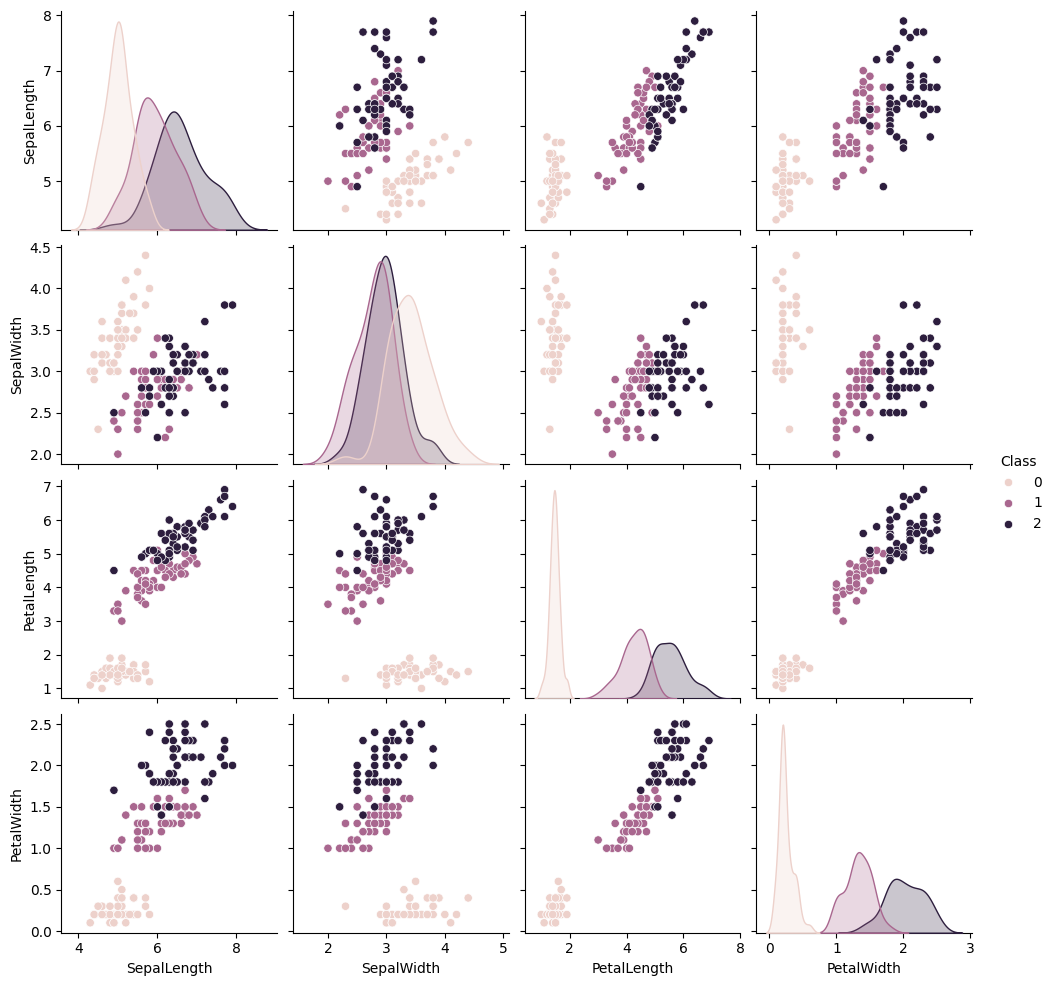

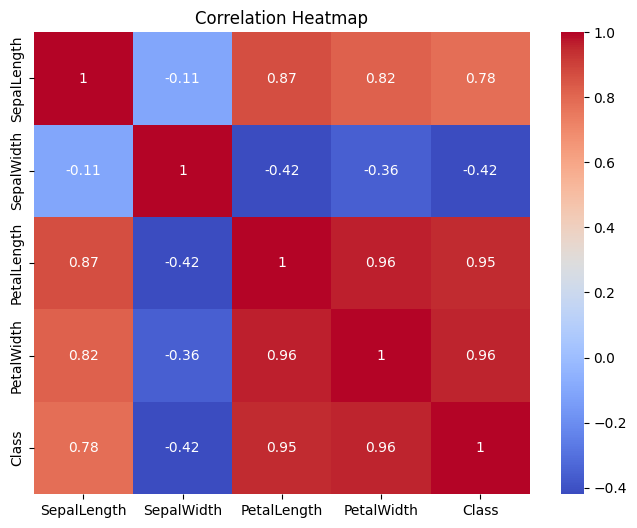


Feature Importances:
        Feature  Importance
2  PetalLength    0.436130
3   PetalWidth    0.436065
0  SepalLength    0.106128
1   SepalWidth    0.021678

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Model saved as model_rf.pkl. Upload this file to GitHub and Launchpad for sharing.

Processed dataset saved as processed_dataset.csv. Upload this file as well.


In [3]:
# Penerapan Predictive Analytics untuk Memprediksi Variabel Target Menggunakan Dataset Publik

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load Dataset
# Replace this link with a public dataset URL
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset = pd.read_csv(data_url, header=None)
dataset.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class']

# Step 2: Dataset Profiling
print("Dataset Shape:", dataset.shape)
print("\nDataset Head:\n", dataset.head())
print("\nDataset Info:\n")
dataset.info()
print("\nSummary Statistics:\n", dataset.describe())

# Step 3: Data Preprocessing
# Handling Missing Values
if dataset.isnull().sum().sum() > 0:
    print("\nMissing values found! Performing imputation.")
    dataset.fillna(dataset.mean(), inplace=True)

# Encoding Categorical Data
label_encoder = LabelEncoder()
dataset['Class'] = label_encoder.fit_transform(dataset['Class'])

# Feature Scaling
features = dataset.drop('Class', axis=1)
target = dataset['Class']
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 4: Exploratory Data Analysis
sns.pairplot(dataset, hue='Class', diag_kind='kde')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Step 5: Feature Selection
# Using Random Forest for Feature Importance
feature_selector = RandomForestClassifier(random_state=42)
feature_selector.fit(features_scaled, target)
importances = feature_selector.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": features.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print("\nFeature Importances:\n", feature_importance_df)

# Step 6: Modeling
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save Model and Share Links
import joblib
joblib.dump(model, "model_rf.pkl")
print("\nModel saved as model_rf.pkl. Upload this file to GitHub and Launchpad for sharing.")

# Optional: Save Preprocessed Data
dataset.to_csv("processed_dataset.csv", index=False)
print("\nProcessed dataset saved as processed_dataset.csv. Upload this file as well.")
